In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from matplotlib.pyplot import figure



<Figure size 800x560 with 0 Axes>

<Figure size 800x560 with 0 Axes>

In [30]:
randstate = np.random.RandomState(42)

In [134]:
X=randstate.rand(20, 2)

In [135]:
X[:3]

array([[0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282]])

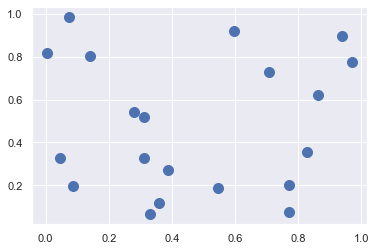

In [151]:
plt.scatter(X[:, 0], X[:, 1], s = 100);

In [137]:
X.shape

(20, 2)

In [138]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis = -1)

In [139]:
dist_sq

array([[0.        , 0.16759276, 0.49785566, 0.53456216, 0.24335232,
        0.15485772, 0.10893638, 0.06778493, 0.29398802, 0.00145923,
        0.1087649 , 0.27416497, 0.31535861, 0.18100894, 0.19979614,
        0.41013157, 0.1655628 , 0.31468998, 0.20876922, 0.03798058],
       [0.16759276, 0.        , 0.52725127, 0.65834444, 0.54581854,
        0.21008737, 0.27121866, 0.03245574, 0.10908858, 0.19868739,
        0.54577412, 0.86619082, 0.05105794, 0.69054978, 0.32174926,
        0.06270604, 0.040195  , 0.29233748, 0.06128767, 0.07525986],
       [0.49785566, 0.52725127, 0.        , 0.01523193, 0.15968252,
        1.11173801, 1.05675877, 0.59125144, 0.19487931, 0.52826582,
        0.68741053, 0.84592564, 0.37119974, 0.93104292, 0.0711532 ,
        0.53085318, 0.80809502, 0.03439202, 0.91425881, 0.63621155],
       [0.53456216, 0.65834444, 0.01523193, 0.        , 0.11742139,
        1.21259558, 1.12404864, 0.69212971, 0.30179175, 0.55770354,
        0.64630196, 0.75661053, 0.51254541, 0

In [140]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(20, 20, 2)

In [141]:
sq_differences = differences ** 2
sq_differences.shape

(20, 20, 2)

In [142]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(20, 20)

In [143]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [144]:
nearest = np.argsort(dist_sq, axis = 1)
print(nearest)

[[ 0  9 19  7 10  6  5 16  1 13 14 18  4 11  8 17 12 15  2  3]
 [ 1  7 16 12 18 15 19  8  0  9  5  6 17 14  2 10  4  3 13 11]
 [ 2  3 17 14  4  8 12  0  1  9 15  7 19 10 16 11 18 13  6  5]
 [ 3  2 17 14  4  8 12  0  9 10  1  7 15 19 11 13 16 18  6  5]
 [ 4 14  3 17  2 10  0  9 11 13  8 19  7  1 12  6 16 15  5 18]
 [ 5  6 19 18 16  7  0  9  1 10 13 12 15  8 11 14 17  4  2  3]
 [ 6  5 19  9  0  7 16 18 10 13  1 11 12 15 14  8  4 17  2  3]
 [ 7 19 16  1 18  0  9  5  6 12 15  8 14 10 17 13  4  2 11  3]
 [ 8 12 17 15  1 14  2  7 19 16  0  3 18  9  4  5  6 10 13 11]
 [ 9  0 19  7 10  6 13  5 16  1 14 18 11  4  8 17 12 15  2  3]
 [10 13 11  9  0  4  6 19 14  7  5 16  1 17 18  3  8  2 12 15]
 [11 13 10  9  0  4  6 14 19  7  5 17  3 16  2  1 18  8 12 15]
 [12 15  8  1  7 16 17 18 19 14  0  9  2  5  3  6  4 10 13 11]
 [13 10 11  9  0  6 19  4  5  7 14 16 18  1 17  3  8  2 12 15]
 [14 17  4  2  3  8  0  9 12  7 19  1 10 15 11 16 13 18  6  5]
 [15 12  1  8 16  7 18 19 17  0 14  9  5  2  6  3  4 10

In [145]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)

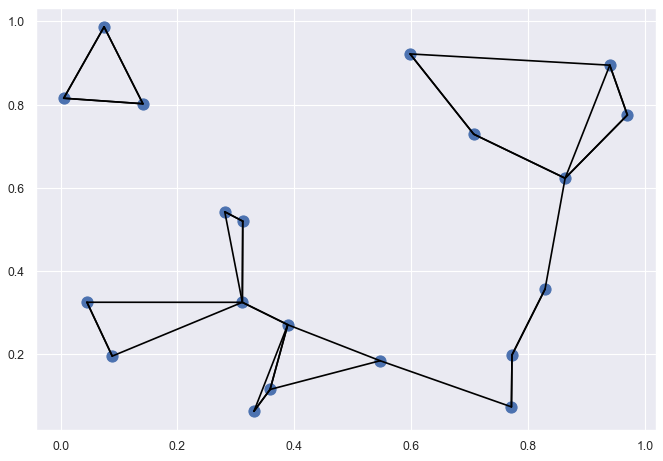

In [152]:
figure(figsize=(10, 7), dpi=80)
plt.scatter(X[:, 0], X[:, 1], s = 100)
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K + 1]:
        plt.plot(*zip(X[j], X[i]), color = "black")